# Predicting The Price Of Pre-Owned Cars


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'

Setting The Plot Size

In [2]:
sns.set(rc={'figure.figsize':(10,10)})

Reading The CSV file

In [3]:
car_data=pd.read_csv('C:\\Users\\jaisw\\Desktop\\Regression project(cars price)\\cars_sampled.csv')

In [4]:
car_data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18


Creating copy so that the changes are not reflected in the original file 

In [5]:
cars=car_data.copy()

In [6]:
rows,cols = cars.shape
print("Number of rows: ", rows)
print("Number of columns: ", cols)

Number of rows:  50001
Number of columns:  19


Data Structure

In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [8]:
# Missing Values:
missing_df = cars.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(cars.shape[0]-missing_df['missing values'])/cars.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,notRepairedDamage,9716,80.568389
1,vehicleType,5188,89.624208
2,fuelType,4503,90.994180
3,gearbox,2824,94.352113
4,model,2758,94.484110
5,dateCrawled,0,100.000000
6,dateCreated,0,100.000000
7,brand,0,100.000000
8,monthOfRegistration,0,100.000000
9,kilometer,0,100.000000


# Data Summary

In [9]:
def num_summary_(data,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10):
    lt = []
    num_min = []
    num_max = []
    num_mean = []
    num_std = []
    num_p_1 = []
    num_p_2 = []
    num_p_3 = []
    num_p_4 = []
    num_p_5 = []
    num_p_6 = []
    num_p_7 = []
    num_p_8 = []
    num_p_9 = []
    num_p_10 = []
    
    for columnName in num_columns:
       
        lt.append(columnName)
        num_min.append(data[columnName].min())
        num_max.append(data[columnName].max())
        num_mean.append(round(data[columnName].mean(),1))
        num_std.append(round(data[columnName].std(),1))
            
        num_p_1.append(data[columnName].quantile(p_1/100))
        num_p_2.append(data[columnName].quantile(p_2/100))
        num_p_3.append(data[columnName].quantile(p_3/100))
        num_p_4.append(data[columnName].quantile(p_4/100))
        num_p_5.append(data[columnName].quantile(p_5/100))
        num_p_6.append(data[columnName].quantile(p_6/100))
        num_p_7.append(data[columnName].quantile(p_7/100))
        num_p_8.append(data[columnName].quantile(p_8/100))
        num_p_9.append(data[columnName].quantile(p_9/100))
        num_p_10.append(data[columnName].quantile(p_10/100))           
            
        
    #print(lt)
    return pd.DataFrame({  "MEAN": num_mean,"STANDARD DEVIATION": num_std,'MIN': num_min,str(p_1)+ "th PERCENTILE": num_p_1,
                         str(p_2)+ "th PERCENTILE": num_p_2, str(p_3)+ "th PERCENTILE": num_p_3, str(p_4)+ "th PERCENTILE": num_p_4,
                         str(p_5)+ "th PERCENTILE": num_p_5, str(p_6)+ "th PERCENTILE": num_p_6, str(p_7)+ "th PERCENTILE": num_p_7,
                          str(p_8)+ "th PERCENTILE": num_p_8, str(p_9)+ "th PERCENTILE": num_p_9, str(p_10)+ "th PERCENTILE": num_p_10,'MAX': num_max},index=lt
                       )
        

    

In [10]:
def prop(a,p):
    n=len(cars)
    percent =n*p/100
    sum_=0
    count_=0
    for x in list(a.values):
        if sum_ < percent:
            count_+=1
            sum_ +=int(x)
            
    return count_


In [11]:
def cat_date_summary(data):
    lt = []
    top_1 = []
    prop_1 = []
    top_2 = []
    prop_2 = []
    top_3 = []
    prop_3 = []
    top_4 = []
    prop_4 = []
    top_5 = []
    prop_5 = []
    top_6 = []
    prop_6 = []
    top_7 = []
    prop_7 = []
    
    lev = []
    lev_10 = []
    lev_50 = []
    lev_80 = []
    lev_90 = []
    
    
    for columnName in cat_columns:
       
        lt.append(columnName)
            
        n=len(data[columnName])
        a=data[columnName].value_counts()
        a.sort_values(ascending = False)
            
        top_1.append(list(a.index)[0])
        per_top_1=a.values[0]*100/n
        prop_1.append('{:.0%}'.format(round(per_top_1,1)/100))
            
        top_2.append(list(a.index)[1])
        per_top_2=a.values[1]*100/n
        prop_2.append('{:.0%}'.format(round(per_top_2,1)/100))
                        
        lev.append(len(a))
            
        lev_10.append(prop(a,10))
        lev_50.append(prop(a,50))
        lev_80.append(prop(a,80))
        lev_90.append(prop(a,90))
    
    #print(lt)
    return pd.DataFrame({"Levels":lev,"#Levels covering 10%":lev_10,
                         "#Levels covering 50%":lev_50,"#Levels covering 80%":lev_80,
                         "#Levels covering 90%":lev_90,"Top 1 Category":top_1,"Top_1(%)":prop_1,
                         "Top 2 Category":top_2,"Top_2(%)":prop_2,
                         },index=lt
                       )

      

In [12]:
# Summary for raw features:

In [13]:
num_columns = ["powerPS","yearOfRegistration","price"]

num_summary_(cars,0.5,1,5,10,25,50,75,90,95,99)

,MEAN,STANDARD DEVIATION,MIN,0.5th PERCENTILE,1th PERCENTILE,5th PERCENTILE,10th PERCENTILE,25th PERCENTILE,50th PERCENTILE,75th PERCENTILE,90th PERCENTILE,95th PERCENTILE,99th PERCENTILE,MAX
powerPS,116.5,230.6,0,0.0,0.0,0.0,0.0,69.0,105.0,150.0,193.0,232.0,344.0,19312
yearOfRegistration,2005.5,123.0,1000,1970.0,1978.0,1992.0,1996.0,1999.0,2003.0,2008.0,2013.0,2016.0,2018.0,9999
price,6559.9,85818.5,0,0.0,0.0,200.0,500.0,1150.0,2950.0,7190.0,13999.0,19650.0,36800.0,12345678


In [14]:
cat_columns = ['dateCrawled', 'name', 'seller', 'offerType', 'abtest',
       'vehicleType', 'gearbox', 'model',
        'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'postalCode', 'lastSeen',"kilometer"]
cat_date_summary(cars)

,Levels,#Levels covering 10%,#Levels covering 50%,#Levels covering 80%,#Levels covering 90%,Top 1 Category,Top_1(%),Top 2 Category,Top_2(%)
dateCrawled,12039,499,3404,6754,8477,3/4/2016 16:57,0%,3/4/2016 17:57,0%
name,38766,278,13766,28766,33766,BMW_318i,0%,Opel_Corsa,0%
seller,2,1,1,1,1,private,100%,commercial,0%
offerType,2,1,1,1,1,offer,100%,request,0%
abtest,2,1,1,2,2,test,52%,control,48%
vehicleType,8,1,3,6,8,limousine,26%,small car,22%
gearbox,2,1,1,2,2,manual,74%,automatic,21%
model,248,2,16,72,144,golf,8%,others,7%
monthOfRegistration,13,1,6,10,12,0,10%,3,10%
fuelType,7,1,1,2,3,petrol,60%,diesel,29%


# Data Cleaning:

Dropping name column:
The information given in this column  is already contained in other columns and this variable doesn't have any standard format. For eg. some car names include model name and some don't. Also, it has more than 37000 unique values out of total 50,002 values.


In [15]:
col={'name'}
cars=cars.drop(columns=col,axis=1)

Removing Duplicate Records

In [16]:
n=cars.shape[0]
cars.drop_duplicates(keep='first',inplace=True)
m=cars.shape[0]


no of duplicates that were present are

In [17]:
n-m

6

# Numerical Variables

Variable Year  of Registration


In [18]:
yearwise_count=cars["yearOfRegistration"].value_counts().sort_index()
m1=sum(cars["yearOfRegistration"]>2016)
m2=sum(cars["yearOfRegistration"]<1970)
cars['yearOfRegistration'].describe()
#print(m1,m2)
#1970 is the 0.5th percentile


count    49995.000000
mean      2005.545255
std        122.999077
min       1000.000000
25%       1999.000000
50%       2003.000000
75%       2008.000000
max       9999.000000
Name: yearOfRegistration, dtype: float64

C:\Users\jaisw\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Frequency')

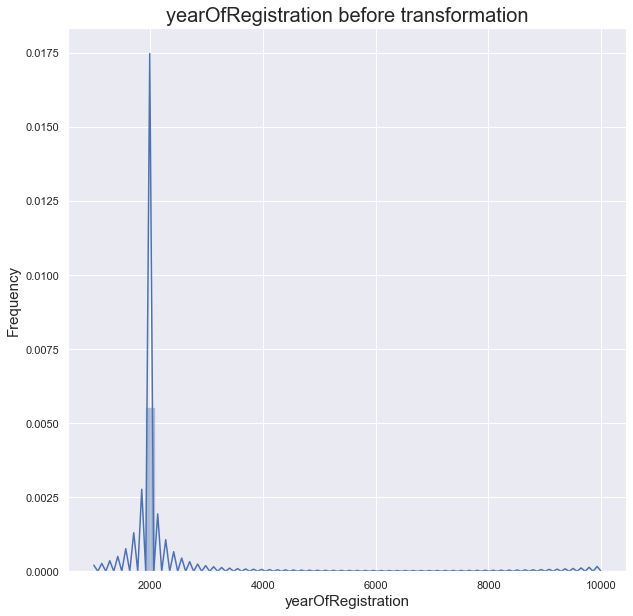

In [19]:
sns.distplot(cars["yearOfRegistration"])
plt.title("yearOfRegistration before transformation",fontsize=20)
plt.xlabel("yearOfRegistration",fontsize=15)
plt.ylabel("Frequency",fontsize=15)

Text(0, 0.5, 'Frequency')

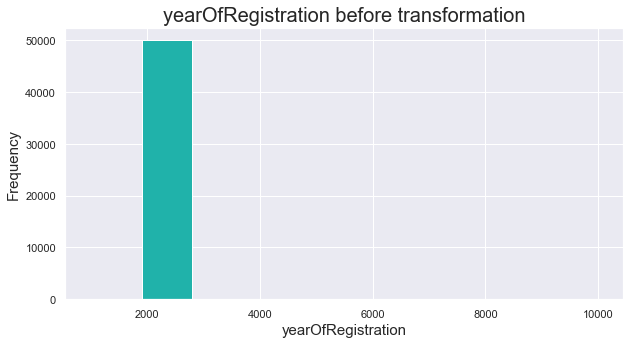

In [20]:
#Histogram:
cars["yearOfRegistration"].plot(kind="hist", figsize = (10,5),color="lightseagreen")
plt.title("yearOfRegistration before transformation",fontsize=20)
plt.xlabel("yearOfRegistration",fontsize=15)
plt.ylabel("Frequency",fontsize=15)

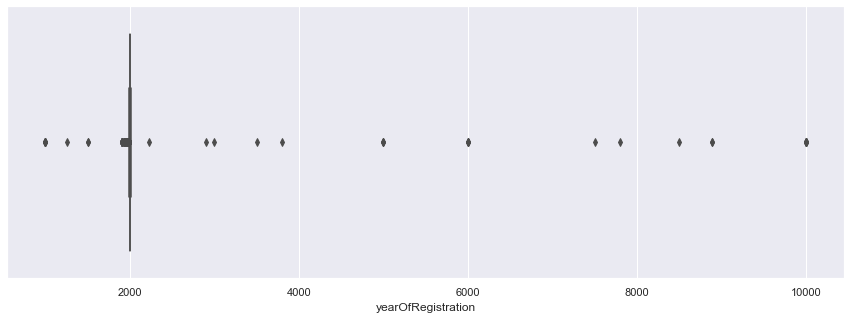

In [21]:
#2) Boxplot:
plt.figure(figsize=(15,5))
sns.boxplot(x=cars["yearOfRegistration"])

Scatterplot Before filtering

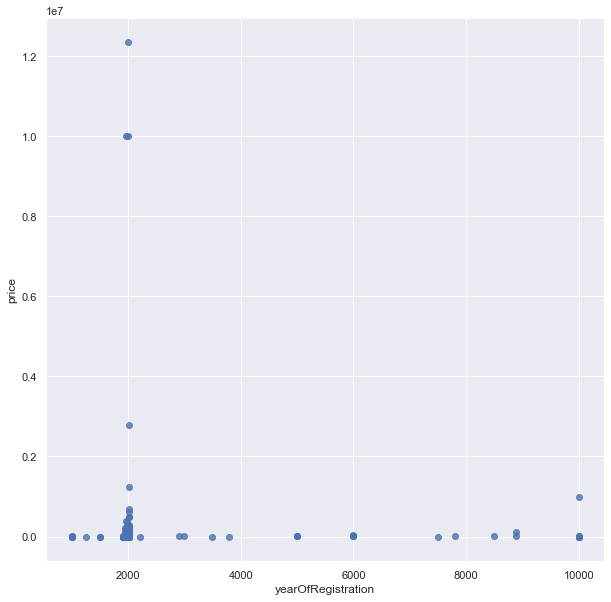

In [22]:
sns.regplot(x='yearOfRegistration',y='price',scatter=True,fit_reg=False,data=cars)


We can see from the above diagrams that the data is highly skewed and that there are a lot of outliers present. Also,a certain range of data doesn't seem to be logical and due to the presence of outliers the diagrams have gotten condensed in a small interval.Also the values are mostly present between the range 1970 to 2016.

Cars with registration date after 2016 have been removed as 2016 is the year of advertisement , and year of manufacturing can’t be after that.Since the yearOfReistration is staring from 1000,this clearly seems inappropriate therefore we needed to find a resonable lowercap for this feature.From the percentile distribution of the variable we can observe that yearOfRegistration increasing from 1000 to 1970 accounts for only 0.5% of the data and after this as we increase the yearOFRegistration, the percentile increases sharply.Therefore we set the working range from 1970 to 2016. 

Variable Price


In [23]:
price_count=cars["price"].value_counts().sort_index()
m1=sum(cars["price"]==0)
m2=sum(cars["price"]<100)
m3=sum(cars["price"]>50000)
print(m1,m2,m3)
cars['price'].describe()


1451 1784 224


count    4.999500e+04
mean     6.559667e+03
std      8.582357e+04
min      0.000000e+00
25%      1.150000e+03
50%      2.950000e+03
75%      7.190000e+03
max      1.234568e+07
Name: price, dtype: float64

Text(0, 0.5, 'Frequency')

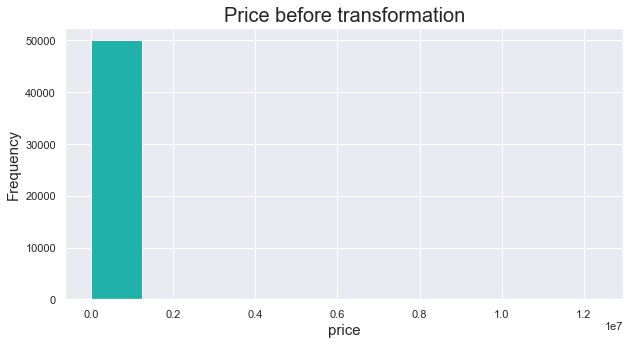

In [24]:
#Histogram:
cars["price"].plot(kind="hist", figsize = (10,5),color="lightseagreen")
plt.title("Price before transformation",fontsize=20)
plt.xlabel("price",fontsize=15)
plt.ylabel("Frequency",fontsize=15)

Boxplot of Variable Price Before filtering

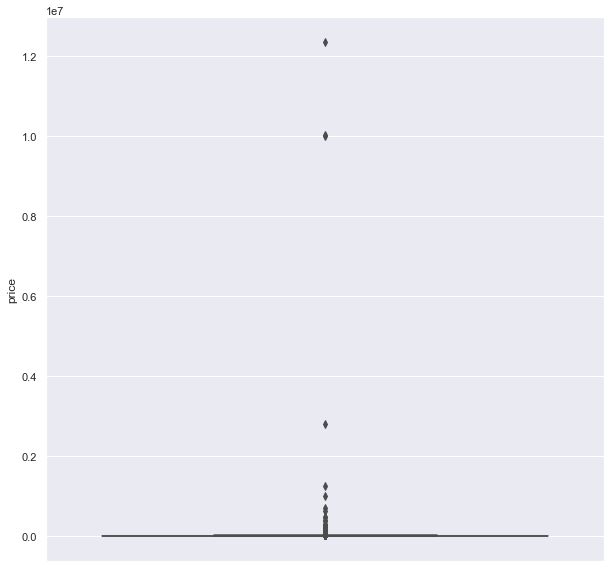

In [25]:
sns.boxplot(y=cars['price'])

In [26]:
cars[cars['price']<50]['powerPS'].count()

1682

We can see from the above diagrams that the data is highly skewed and that there are a lot of outliers present. Also,a certain range of data doesn't seem to be logical and due to the presence of outliers the diagrams have gotten condensed in a small interval.Also the values are mostly present between the range 0 to 35000.

Since the scrap value of a car starts from 100, therefore we exclude all the cars having price below 100.Also, after doing some research on the internet, we concluded that the price for a used car can't be more than $100000,therefore we are going to exclude them.From the percentile distribution of the variable we can observe that in the interval  50000 to 100000,there is a sharp increase in the price of the car and it only accounts for 0.34% of the data.therefoe to counter the impact of exceptionally large values on the regression model,we are going to cap all values in the range 50000 to 100000 as 50000.


Variable PowerPS

In [27]:
m1=sum(cars['powerPS']<50)
m2=sum(cars['powerPS']>500)
print(m1,m2)
cars['powerPS'].describe()

6408 115


count    49995.000000
mean       116.497170
std        230.580314
min          0.000000
25%         69.000000
50%        105.000000
75%        150.000000
max      19312.000000
Name: powerPS, dtype: float64

Text(0, 0.5, 'Frequency')

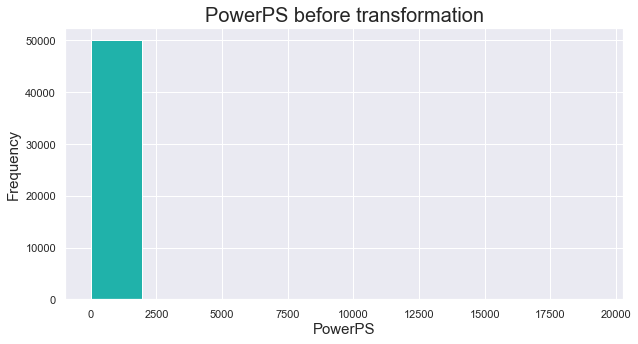

In [28]:
#Histogram:
cars["powerPS"].plot(kind="hist", figsize = (10,5),color="lightseagreen")
plt.title("PowerPS before transformation",fontsize=20)
plt.xlabel("PowerPS",fontsize=15)
plt.ylabel("Frequency",fontsize=15)

Scatterplot Before Filtering


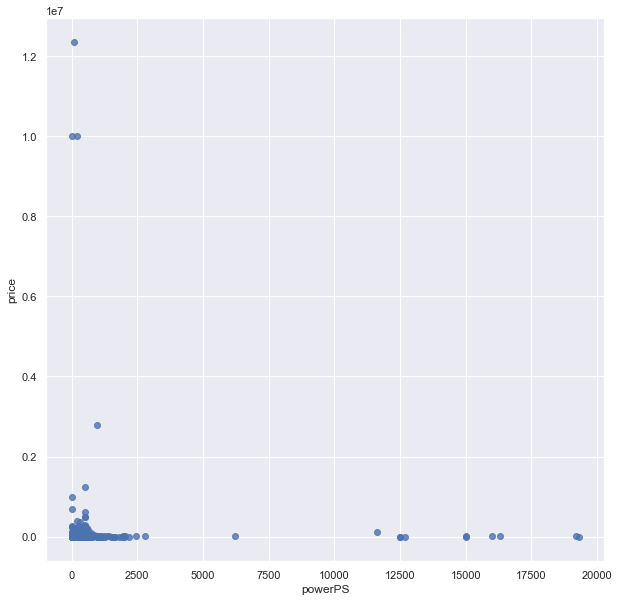

In [29]:
sns.regplot(x='powerPS',y='price',scatter=True,fit_reg=False,data=cars)

We can see from the above diagrams that the data is highly positively skewed and that there are a lot of outliers present on both th ends. Also,a certain range of data doesn't seem to be logical and due to the presence of outliers the diagrams have gotten condensed in a small interval.

PowerPS can't be less than 50 as it is the minimum power required to start a car,therefor we are going to exclude all cars having PowerPS less than 50.Also,after doing some research on internet we found that cars having PowerPs greater than 1200 didn't exist during the time this data was taken,therefore we exclude them.From the percentile distribution of the variable we can observe that in the interval  500 to 1200,there is a sharp increase in the powerPS of the car and it only accounts for 0.2% of the data.therefore to counter the impact of exceptionally large values on the regression model,we are going to cap all values in the range 500 to 1200 as 500.

Working Range of Data

In [30]:
m=cars.shape[0]
cars=cars[(cars["yearOfRegistration"]<=2016) & (cars["yearOfRegistration"]>=1970)&(cars["price"]>=50)&(cars["price"]<=1000000)&(cars['powerPS']>=50)&(cars['powerPS']<=1200)]
n=cars.shape[0]
print("No of records dropped are:",m-n)


No of records dropped are: 8856


In [31]:
print(m,n)

49995 41139


In [32]:
# capping for PowePS:
cars['powerPS'] = cars.apply(lambda row: (500 if row['powerPS']>500 else row['powerPS']) ,axis=1)

In [33]:
# capping for Price:
cars['price'] = cars.apply(lambda row: 100000 if row['price']>100000 else row['price'],axis=1)
cars['price'] = cars.apply(lambda row: 100 if row['price']<100 else row['price'],axis=1)

In [34]:
cars.shape

(41139, 18)

To simplify,we do Variable reduction by combining(adding) yearOfRegistration and monthOfRegistration

In [35]:
cars['monthOfRegistration']/=12
cars['Age']=(2016-cars['yearOfRegistration'])+cars['monthOfRegistration']
cars['Age']=round(cars['Age'],2)
cars['Age'].describe()

count    41139.000000
mean        13.081299
std          6.297862
min          0.000000
25%          8.670000
50%         13.000000
75%         17.170000
max         46.920000
Name: Age, dtype: float64

In [36]:
cars=cars.drop(columns=['yearOfRegistration','monthOfRegistration'],axis=1)

Text(0, 0.5, 'Frequency')

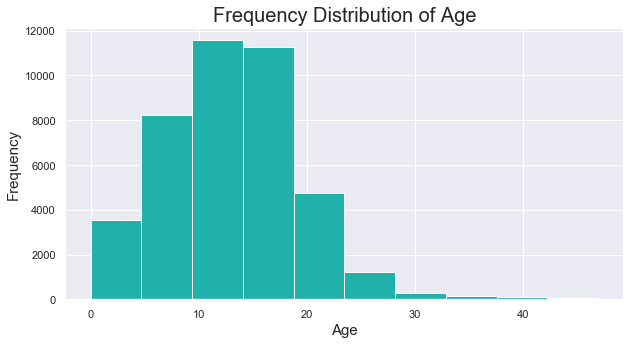

In [37]:
#Histogram:
cars["Age"].plot(kind="hist", figsize = (10,5),color="lightseagreen")
plt.title("Frequency Distribution of Age",fontsize=20)
plt.xlabel("Age",fontsize=15)
plt.ylabel("Frequency",fontsize=15)

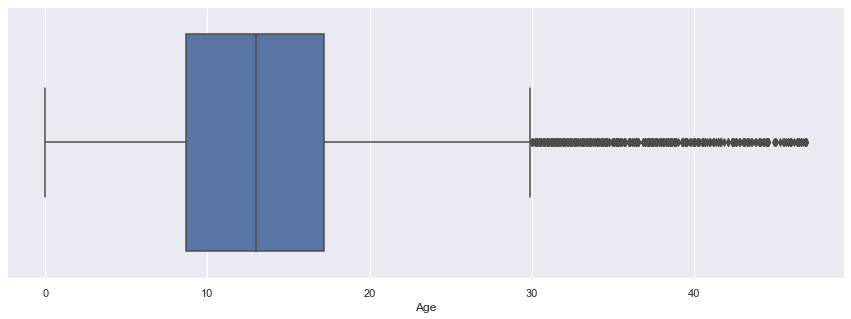

In [38]:
#2) Boxplot:
plt.figure(figsize=(15,5))
sns.boxplot(x=cars["Age"])

The frequency for the age variable is mostly evenly spread over the entire range of the variable but slightly positively skewed.

Treating Datetime variables such as dateCrawled, dateCreated and lastSeen:

In [39]:
cars['dateCrawled'] = pd.to_datetime(cars['dateCrawled'])
cars['dateCreated'] = pd.to_datetime(cars['dateCreated'])
cars['lastSeen'] = pd.to_datetime(cars['lastSeen'])

In [40]:
cars['dateCrawled_year']= cars['dateCrawled'].dt.year
cars['dateCrawled_month'] = cars['dateCrawled'].dt.month
cars['dateCrawled_day'] = cars['dateCrawled'].dt.day
cars['dateCreated_year'] = cars['dateCreated'].dt.year
cars['dateCreated_month'] = cars['dateCreated'].dt.month
cars['dateCreated_day'] = cars['dateCreated'].dt.day
cars['lastSeen_year'] = cars['lastSeen'].dt.year
cars['lastSeen_month'] = cars['lastSeen'].dt.month
cars['lastSeen_day'] = cars['lastSeen'].dt.day

In [41]:
cars.drop(['dateCrawled', 'dateCreated', 'lastSeen'], axis=1, inplace=True)

In [42]:
cars.dateCrawled_year

0        2016
1        2016
2        2016
3        2016
4        2016
         ... 
49991    2016
49992    2016
49993    2016
49994    2016
49995    2016
Name: dateCrawled_year, Length: 41139, dtype: int64

In [43]:
cars.head(2)

,seller,offerType,price,abtest,vehicleType,gearbox,powerPS,model,kilometer,fuelType,...,Age,dateCrawled_year,dateCrawled_month,dateCrawled_day,dateCreated_year,dateCreated_month,dateCreated_day,lastSeen_year,lastSeen_month,lastSeen_day
0,private,offer,4450,test,limousine,manual,150,3er,150000,diesel,...,13.25,2016,3,30,2016,3,30,2016,7,4
1,private,offer,13299,control,suv,manual,163,xc_reihe,150000,diesel,...,11.50,2016,7,3,2016,7,3,2016,3,26


In [44]:
cars.columns

Index(['seller', 'offerType', 'price', 'abtest', 'vehicleType', 'gearbox',
       'powerPS', 'model', 'kilometer', 'fuelType', 'brand',
       'notRepairedDamage', 'postalCode', 'Age', 'dateCrawled_year',
       'dateCrawled_month', 'dateCrawled_day', 'dateCreated_year',
       'dateCreated_month', 'dateCreated_day', 'lastSeen_year',
       'lastSeen_month', 'lastSeen_day'],
      dtype='object')

In [45]:
print(cars.dateCrawled_year.unique())

[2016]


dateCrawler_year takes only 1 value, hence insignificant

In [46]:
print(cars['lastSeen_year'].unique())

[2016]


lastSeen_year takes only 1 value, hence insignificant

In [47]:
print(cars['dateCreated_year'].unique())

[2016 2015]


In [48]:
cars['dateCreated_year'].value_counts()

2016    41133
2015        6
Name: dateCreated_year, dtype: int64

In [49]:
from collections import Counter
Counter(cars['dateCreated_year'])

Counter({2016: 41133, 2015: 6})

In [50]:
cars.groupby("dateCreated_year")["seller"].count()

dateCreated_year
2015        6
2016    41133
Name: seller, dtype: int64

dateCreated_year takes only 2 values in which 2015 occurs only 7 times.
So, either this variable may also be considered insignificant.

In [51]:
cars = cars[cars["dateCreated_year"]==2016]
cars.shape

(41133, 23)

 Converting the month and day columns of the 3 variables to number of days

In [52]:
#Not Requried in the model:
'''cars['dateCrawled_days'] = cars['dateCrawled_month']*30 + cars['dateCrawled_day']
cars['dateCreated_days'] = cars['dateCreated_month']*30 + cars['dateCreated_day']
cars['lastSeen_days'] = cars['lastSeen_month']*30 + cars['lastSeen_day']'''

"cars['dateCrawled_days'] = cars['dateCrawled_month']*30 + cars['dateCrawled_day']\ncars['dateCreated_days'] = cars['dateCreated_month']*30 + cars['dateCreated_day']\ncars['lastSeen_days'] = cars['lastSeen_month']*30 + cars['lastSeen_day']"

In [53]:
col = ['dateCrawled_year', 'dateCrawled_day', 'dateCreated_year', 
       'dateCreated_day', 'lastSeen_year',  'lastSeen_day']

cars.drop(col, axis=1, inplace=True)

In [54]:
num_columns = ["Age"]

num_summary_(cars,0.5,1,5,10,25,50,75,90,95,99)

,MEAN,STANDARD DEVIATION,MIN,0.5th PERCENTILE,1th PERCENTILE,5th PERCENTILE,10th PERCENTILE,25th PERCENTILE,50th PERCENTILE,75th PERCENTILE,90th PERCENTILE,95th PERCENTILE,99th PERCENTILE,MAX
Age,13.1,6.3,0.0,0.08,0.33,3.25,5.25,8.67,13.0,17.17,20.33,23.0,31.1412,46.92


In [55]:
cat_columns = ["dateCrawled_month","dateCreated_month","lastSeen_month"]
cat_date_summary(cars)

,Levels,#Levels covering 10%,#Levels covering 50%,#Levels covering 80%,#Levels covering 90%,Top 1 Category,Top_1(%),Top 2 Category,Top_2(%)
dateCrawled_month,12,1,1,6,9,3,63%,4,4%
dateCreated_month,12,1,1,6,9,3,63%,4,4%
lastSeen_month,12,1,2,4,6,3,37%,6,23%


In [56]:
cars.head()

,seller,offerType,price,abtest,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,postalCode,Age,dateCrawled_month,dateCreated_month,lastSeen_month
0,private,offer,4450,test,limousine,manual,150,3er,150000,diesel,bmw,NaN,20257,13.25,3,3,7
1,private,offer,13299,control,suv,manual,163,xc_reihe,150000,diesel,volvo,no,88045,11.50,7,7,3
2,private,offer,3200,test,bus,manual,101,touran,150000,diesel,volkswagen,NaN,27449,13.92,1,3,1
3,private,offer,4500,control,small car,manual,86,ibiza,60000,petrol,seat,no,34537,11.00,3,3,7
4,private,offer,18750,test,suv,automatic,185,xc_reihe,150000,diesel,volvo,no,55270,8.92,3,3,1


In [57]:
cars.shape

(41133, 17)

Plotting the Scatterplots,boxplots and histograms after filtering the Data

Text(0, 0.5, 'Frequency')

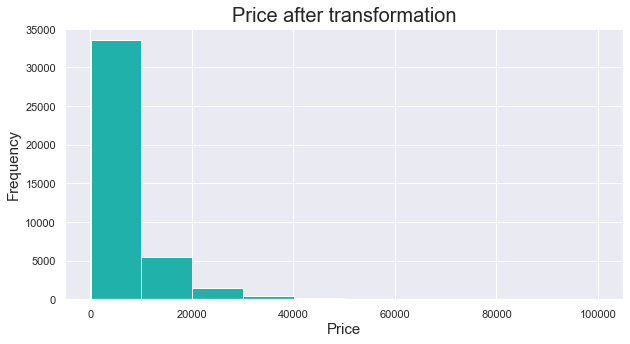

In [58]:
#Histogram:
cars["price"].plot(kind="hist", figsize = (10,5),color="lightseagreen")
plt.title("Price after transformation",fontsize=20)
plt.xlabel("Price",fontsize=15)
plt.ylabel("Frequency",fontsize=15)

Text(0, 0.5, 'Frequency')

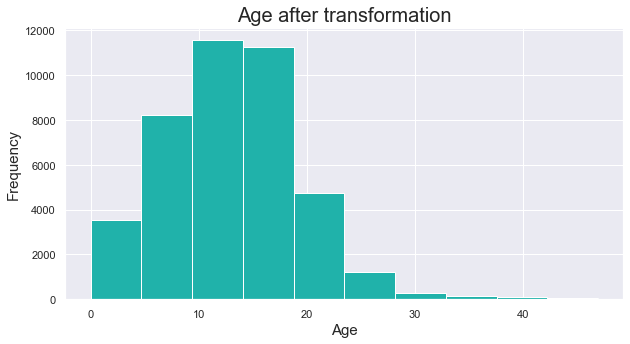

In [59]:
#Histogram:
cars["Age"].plot(kind="hist", figsize = (10,5),color="lightseagreen")
plt.title("Age after transformation",fontsize=20)
plt.xlabel("Age",fontsize=15)
plt.ylabel("Frequency",fontsize=15)

Text(0, 0.5, 'Frequency')

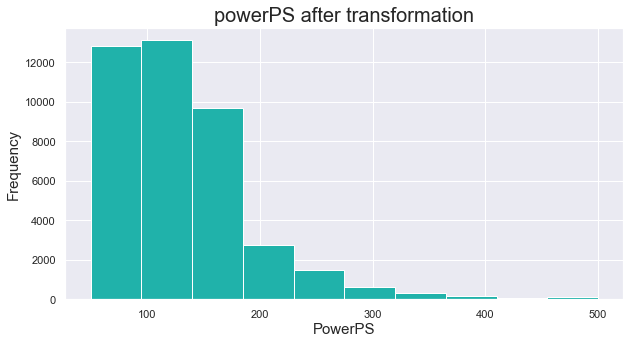

In [60]:
#Histogram:
cars["powerPS"].plot(kind="hist", figsize = (10,5),color="lightseagreen")
plt.title("powerPS after transformation",fontsize=20)
plt.xlabel("PowerPS",fontsize=15)
plt.ylabel("Frequency",fontsize=15)

Boxplots after Transformation

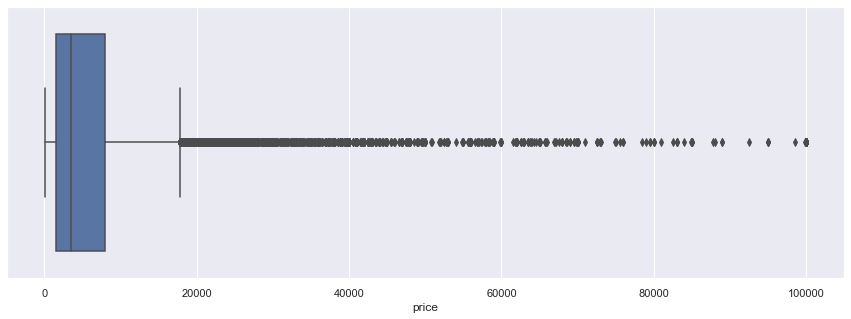

In [61]:
plt.figure(figsize=(15,5))
sns.boxplot(x=cars["price"])

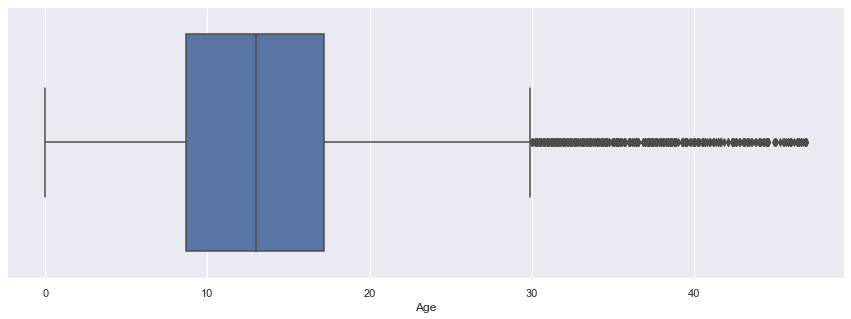

In [62]:
plt.figure(figsize=(15,5))
sns.boxplot(x=cars["Age"])

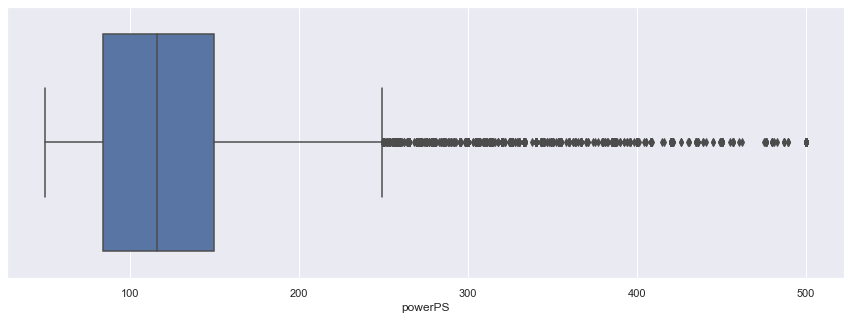

In [63]:
plt.figure(figsize=(15,5))
sns.boxplot(x=cars["powerPS"])

Scatterplots After transformation

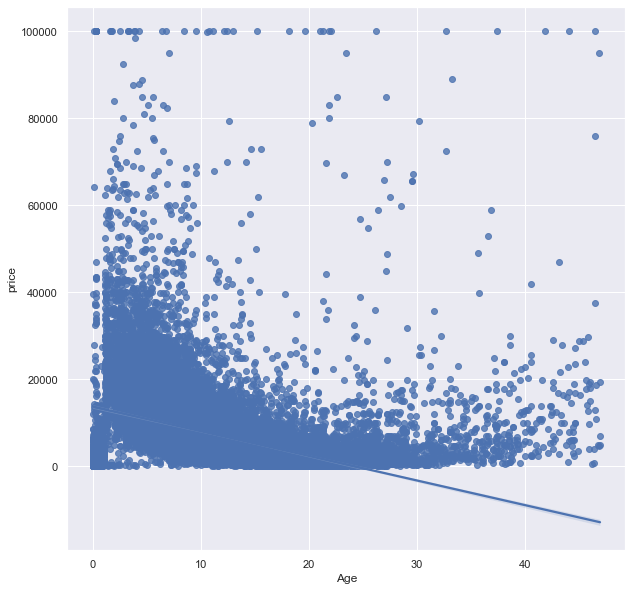

In [64]:
sns.regplot(x='Age',y='price',scatter=True,fit_reg=True,data=cars)

After data cleaning, we can clearly see from the scatterplot that with an increase in age, the price of car decreases.

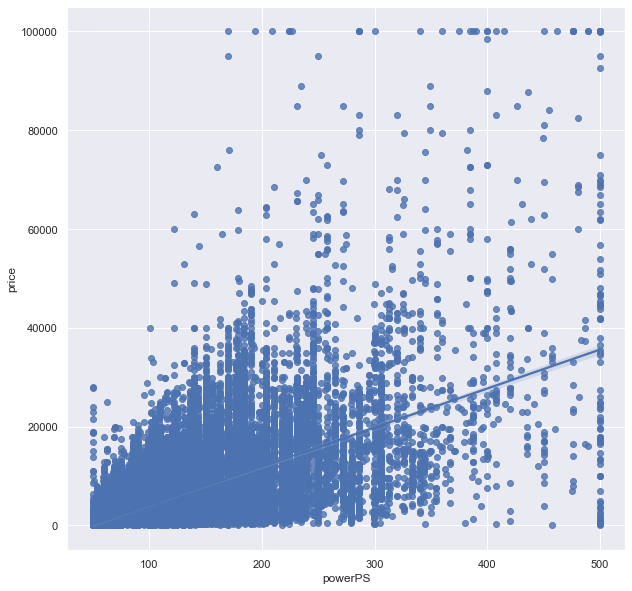

In [65]:
sns.regplot(x='powerPS',y='price',scatter=True,fit_reg=True,data=cars)

After data cleaning, we can clearly see from the scatterplot that with an increase in powerPS,the price of car increases.

From the above diagrams, we can see that most of the cars were approached for selling/advertised between 100 and 150 days.Also, we can't see any pattern between lastseen_days/datacrawled_days/ datecreated_days and price.

# Categorical Variables

Variable seller

In [66]:
cars['seller'].value_counts()


private    41133
Name: seller, dtype: int64

Only one car is commercial therefore there's no point including variable seller.


Variable offerType

In [67]:
cars['offerType'].value_counts()

offer    41133
Name: offerType, dtype: int64

All cars are offer type therefore there's no point including variable offerType.


Variable abtest

In [68]:
cars['abtest'].value_counts()

test       21253
control    19880
Name: abtest, dtype: int64

Variable vehicle Type

In [69]:
cars['vehicleType'].value_counts()


limousine        11808
small car         8899
station wagon     8151
bus               3618
cabrio            2766
coupe             2263
suv               1834
others             320
Name: vehicleType, dtype: int64

In [70]:
pd.crosstab(cars['vehicleType'],columns='count',normalize=True)

col_0,count
vehicleType,
bus,0.091228
cabrio,0.069745
coupe,0.057061
limousine,0.297738
others,0.008069
small car,0.224388
station wagon,0.205527
suv,0.046244


Variable Model

In [71]:
cars['model'].value_counts()

golf          3345
others        2777
3er           2467
polo          1340
astra         1238
              ... 
serie_2          1
elefantino       1
charade          1
200              1
serie_3          1
Name: model, Length: 246, dtype: int64

In [72]:
pd.crosstab(cars['model'],columns='count',normalize=True)

col_0,count
model,
100,0.001160
145,0.000101
147,0.001463
156,0.001639
159,0.000454
...,...
yaris,0.003278
yeti,0.000656
ypsilon,0.000504


Variable Kilometer

In [73]:
cars['kilometer'].value_counts()

150000    26339
125000     4403
100000     1756
90000      1421
80000      1326
70000      1143
60000      1087
50000       902
40000       787
30000       694
20000       636
5000        441
10000       198
Name: kilometer, dtype: int64

In [74]:
pd.crosstab(cars['kilometer'],columns='count',normalize=True)

col_0,count
kilometer,
5000,0.010721
10000,0.004814
20000,0.015462
30000,0.016872
40000,0.019133
50000,0.021929
60000,0.026426
70000,0.027788
80000,0.032237


Variable Fuel Type

In [75]:
cars['fuelType'].value_counts()

petrol     25609
diesel     12739
lpg          679
cng           70
hybrid        36
electro        5
other          3
Name: fuelType, dtype: int64

In [76]:
pd.crosstab(cars['fuelType'],columns='count',normalize=True)

col_0,count
fuelType,
cng,0.001788
diesel,0.325464
electro,0.000128
hybrid,0.000920
lpg,0.017348
other,0.000077
petrol,0.654276


Variable Brand

In [77]:
cars['brand'].value_counts()

volkswagen        8691
bmw               4821
opel              4195
mercedes_benz     4103
audi              3925
ford              2710
renault           1846
peugeot           1269
fiat               923
seat               845
skoda              686
mazda              646
nissan             571
citroen            559
toyota             537
smart              505
volvo              425
mini               414
hyundai            402
mitsubishi         350
honda              291
porsche            275
kia                269
sonstige_autos     255
suzuki             254
alfa_romeo         238
chevrolet          202
chrysler           151
dacia              120
subaru             110
jeep                87
land_rover          79
jaguar              76
saab                64
daihatsu            60
lancia              55
daewoo              51
rover               51
lada                22
Name: brand, dtype: int64

In [78]:
pd.crosstab(cars['brand'],columns='count',normalize=True)

col_0,count
brand,
alfa_romeo,0.005786
audi,0.095422
bmw,0.117205
chevrolet,0.004911
chrysler,0.003671
citroen,0.013590
dacia,0.002917
daewoo,0.001240
daihatsu,0.001459


Variable notRepairedDamage.                     .
yes->car is damaged but not rectified.                  .
no->car is damaged but has been rectified

In [79]:
cars['notRepairedDamage'].value_counts()

no     31709
yes     3814
Name: notRepairedDamage, dtype: int64

Removing insignificant columns

In [80]:
col=['seller','offerType']
cars=cars.drop(columns=col,axis=1)
cars.head()

,price,abtest,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,postalCode,Age,dateCrawled_month,dateCreated_month,lastSeen_month
0,4450,test,limousine,manual,150,3er,150000,diesel,bmw,NaN,20257,13.25,3,3,7
1,13299,control,suv,manual,163,xc_reihe,150000,diesel,volvo,no,88045,11.50,7,7,3
2,3200,test,bus,manual,101,touran,150000,diesel,volkswagen,NaN,27449,13.92,1,3,1
3,4500,control,small car,manual,86,ibiza,60000,petrol,seat,no,34537,11.00,3,3,7
4,18750,test,suv,automatic,185,xc_reihe,150000,diesel,volvo,no,55270,8.92,3,3,1


In [81]:
cars.shape

(41133, 15)

# Variable Importance

In [82]:
cars.to_csv("cars_cleaned.csv",index_label=False)

In [83]:
cars = pd.read_csv("cars_cleaned.csv")

In [84]:
cars.head()

,price,abtest,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,postalCode,Age,dateCrawled_month,dateCreated_month,lastSeen_month
0,4450,test,limousine,manual,150,3er,150000,diesel,bmw,NaN,20257,13.25,3,3,7
1,13299,control,suv,manual,163,xc_reihe,150000,diesel,volvo,no,88045,11.50,7,7,3
2,3200,test,bus,manual,101,touran,150000,diesel,volkswagen,NaN,27449,13.92,1,3,1
3,4500,control,small car,manual,86,ibiza,60000,petrol,seat,no,34537,11.00,3,3,7
4,18750,test,suv,automatic,185,xc_reihe,150000,diesel,volvo,no,55270,8.92,3,3,1


In [85]:
cars.shape

(41133, 15)

Numeric Features(2):

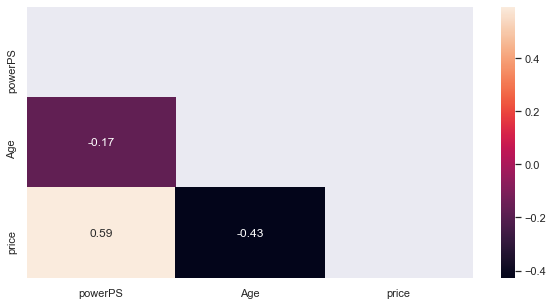

In [86]:
num_features = ["powerPS","Age","price"]
df_correlation = cars[num_features]
plt.figure(figsize=(10,5))
matrix = np.triu(df_correlation.corr())
sns.heatmap(df_correlation.corr(), annot=True, mask=matrix)

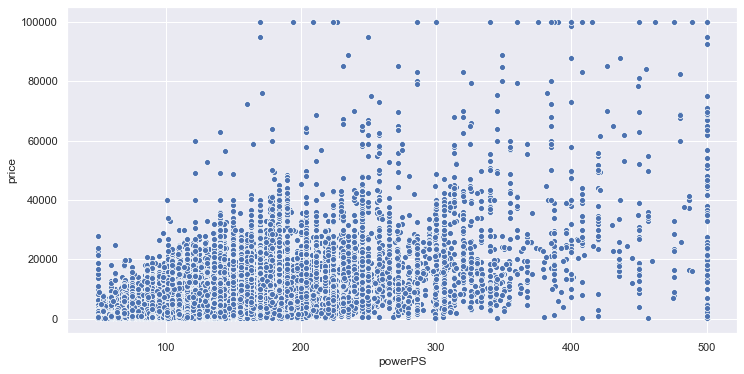

In [87]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=cars["powerPS"], y=cars["price"])

We can clearly see from the scatterplot that with an increase in powerPS,the price of car increases.

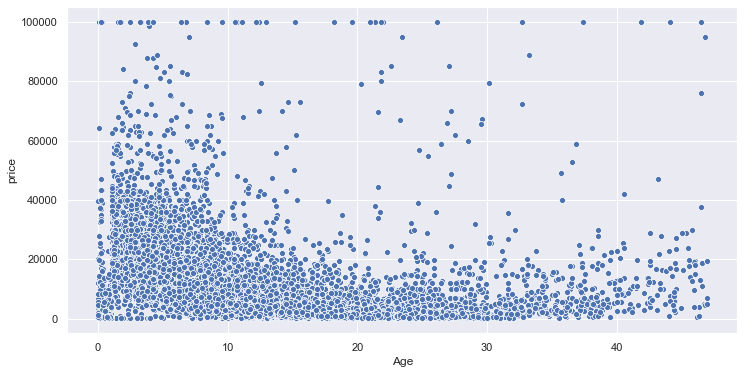

In [88]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=cars["Age"], y=cars["price"])

we can clearly see from the scatterplot that with an increase in age, the price of car decreases.

Categorical Features:

In [89]:
cat_features=[ 'abtest', 'vehicleType', 'gearbox',  'model','kilometer', 'fuelType', 'brand', 'notRepairedDamage', 'postalCode',"dateCrawled_month","dateCreated_month","lastSeen_month"]

Boxplots:

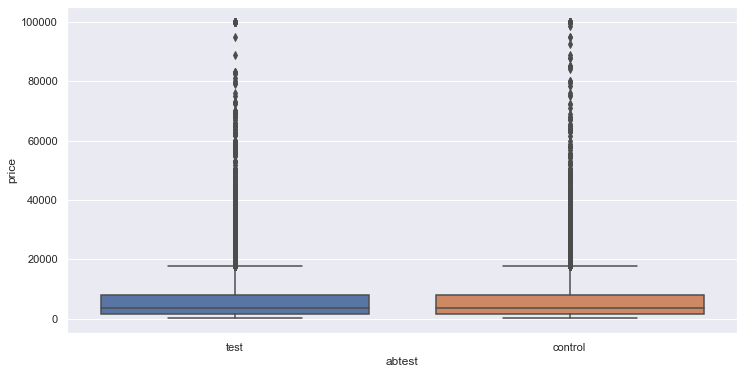

In [90]:
plt.figure(figsize=(12,6))
sns.boxplot(x='abtest',y='price',data=cars)

The boxplot for both level seem to be the same i.e. Abtest seems to be an insignificant variable to predict price.

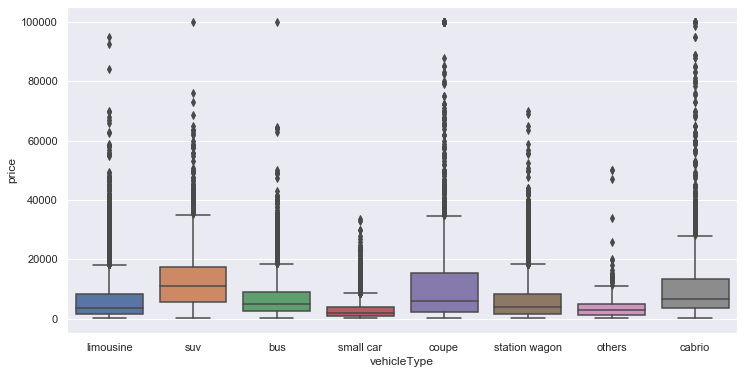

In [91]:
plt.figure(figsize=(12,6))
sns.boxplot(x='vehicleType',y='price',data=cars)

Looking at the boxplot,vehicleType seems to be associated with price.

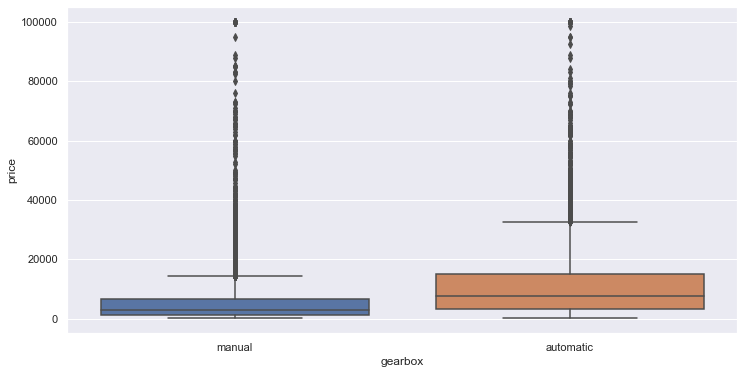

In [92]:
plt.figure(figsize=(12,6))
sns.boxplot(x='gearbox',y='price',data=cars)

Looking at the boxplot,gearbox seems to be associated with price.

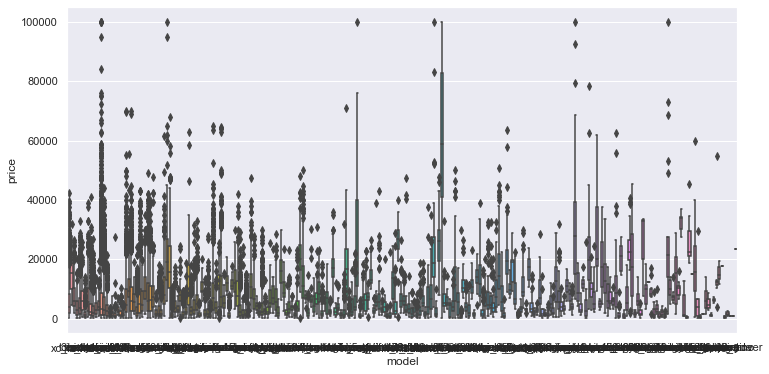

In [93]:
plt.figure(figsize=(12,6))
sns.boxplot(x='model',y='price',data=cars)

Car prices are distributed over the entire range of models.We are not able to infer anything from this plot.

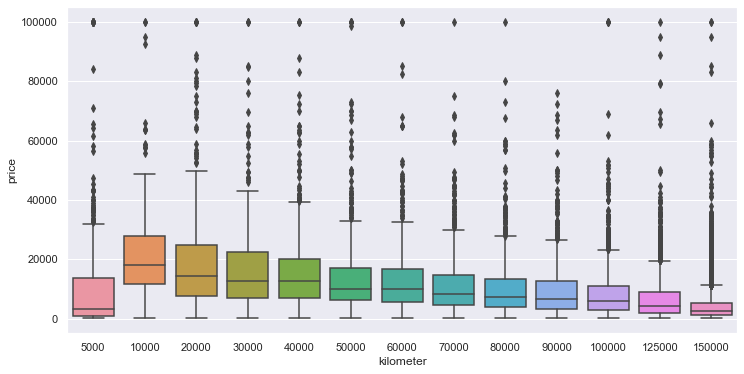

In [94]:
plt.figure(figsize=(12,6))
sns.boxplot(x='kilometer',y='price',data=cars)

Overall as kilometer increases, price decreases. So,variable kilometer seems to be associated with price.

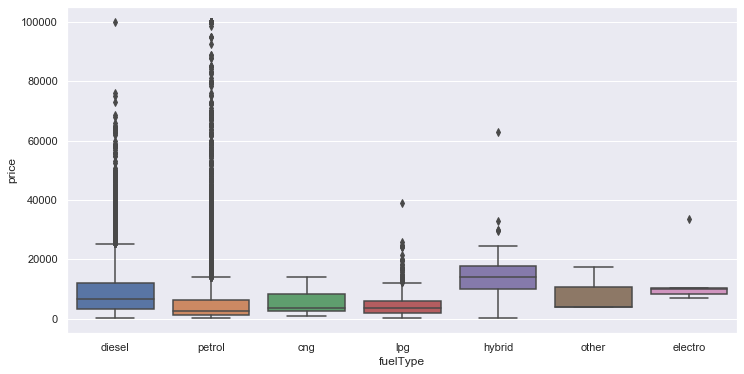

In [95]:
plt.figure(figsize=(12,6))
sns.boxplot(x='fuelType',y='price',data=cars)

Looking at the boxplots,fuelType seems to be associated with price.

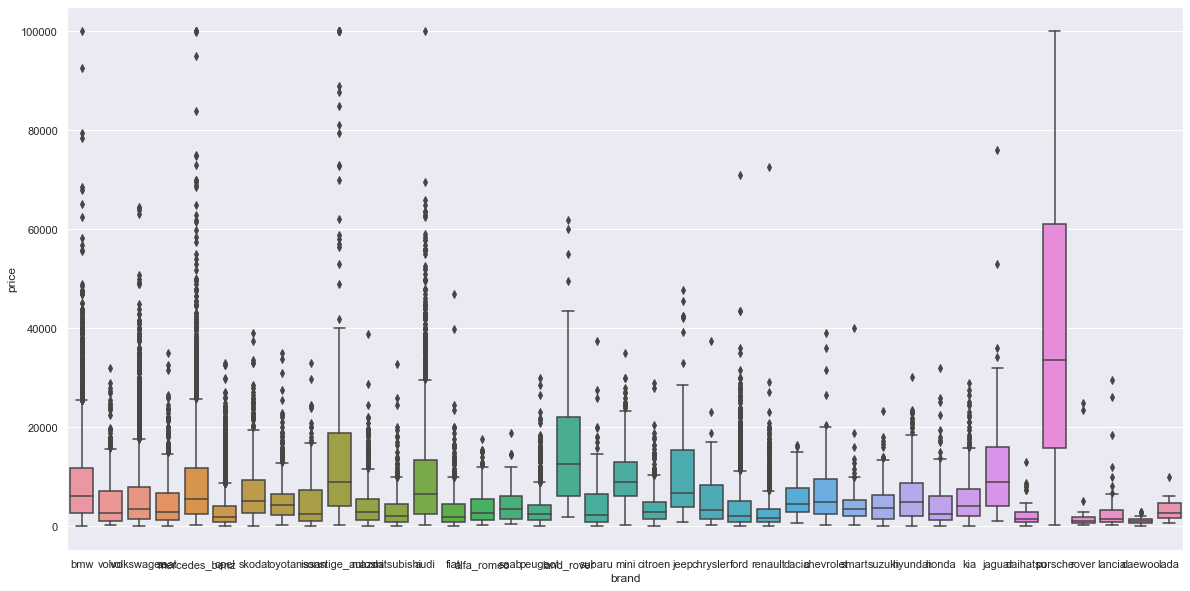

In [96]:
plt.figure(figsize=(20,10))
sns.boxplot(x='brand',y='price',data=cars)

Looking at the boxplots,brand seems to be associated with price

As expected the cars that require the damages to be repaired, fall under low price ranges. So, it seems to be associated with price.

Car prices are distributed over the entire range of postolcode.We are not able to infer anything from this plot.

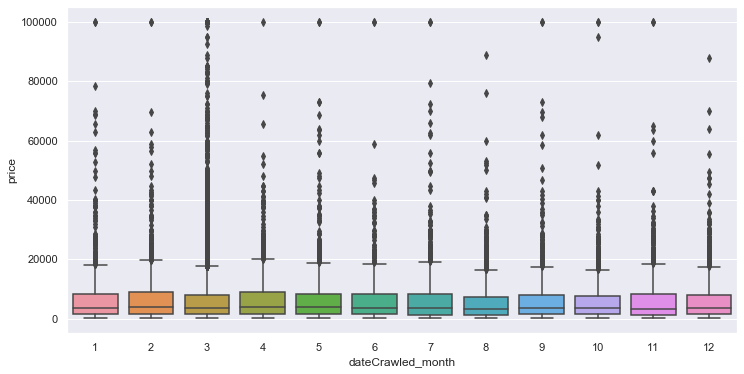

In [97]:
plt.figure(figsize=(12,6))
sns.boxplot(x="dateCrawled_month",y='price',data=cars)

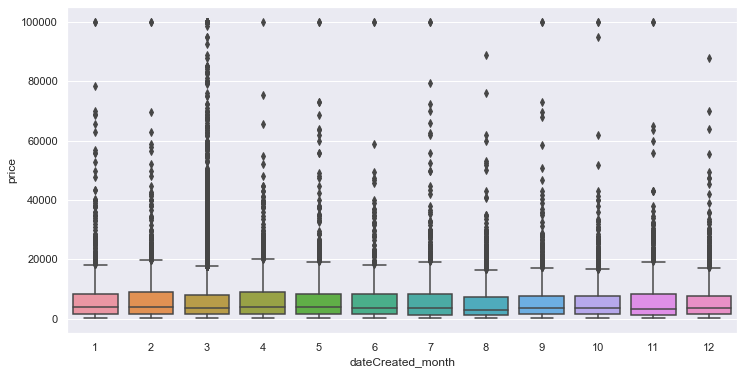

In [98]:
plt.figure(figsize=(12,6))
sns.boxplot(x="dateCreated_month",y='price',data=cars)

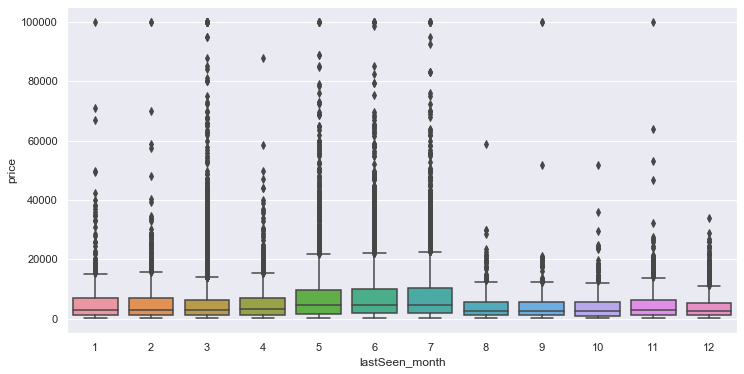

In [99]:
plt.figure(figsize=(12,6))
sns.boxplot(x="lastSeen_month",y='price',data=cars)

Anova Test:

In [100]:
#checking normality of response variable:
from scipy.stats import norm
from scipy.stats import shapiro
H,p = shapiro(cars["price"])
print("Test Statistics: ",H)
print("P-value: ",p)
alpha = 0.05
if p > alpha:
	print('normal')
else:
	print('not normal')

Test Statistics:  0.6407779455184937
P-value:  0.0
not normal


C:\Users\jaisw\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Text(0, 0.5, 'Frequency')

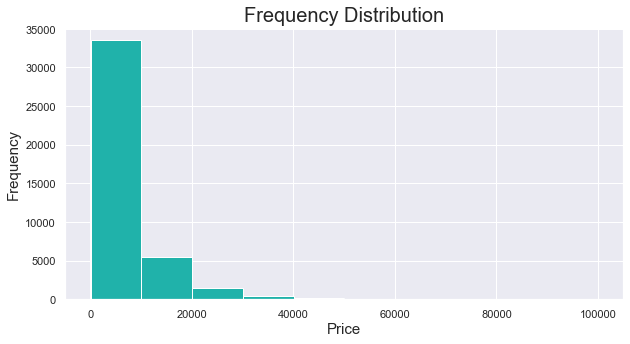

In [101]:
#Histogram:
cars["price"].plot(kind="hist", figsize = (10,5),color="lightseagreen")
plt.title("Frequency Distribution",fontsize=20)
plt.xlabel("Price",fontsize=15)
plt.ylabel("Frequency",fontsize=15)

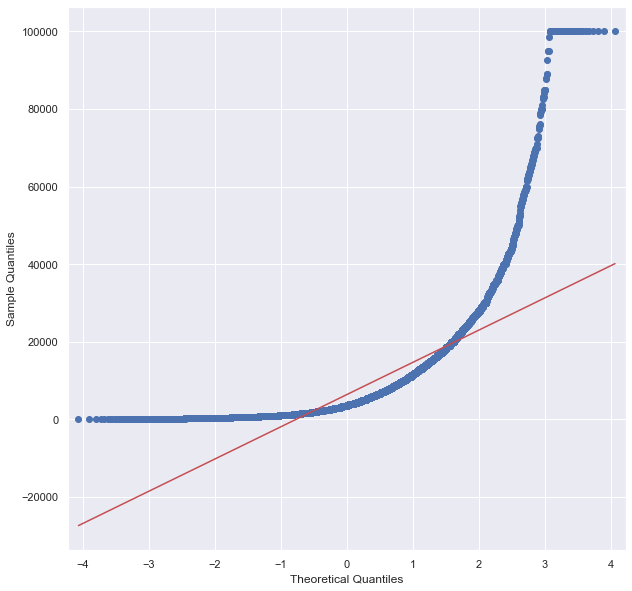

In [102]:
#QQ-Plot:
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
qqplot(cars["price"],line='s')
plt.show()

Conclusion: Response is not normally distributed. Hence ANOVA test is not valid.

Kruskal Wallis H test (Non-parametric alternative to ANOVA):

In [103]:
#Kruskal Wallis H test for raw data:

from pingouin import kruskal

In [104]:
cat_features=[ 'abtest', 'vehicleType', 'gearbox',  'model','kilometer', 'fuelType', 'brand', 'notRepairedDamage', 'postalCode',"dateCrawled_month","dateCreated_month","lastSeen_month"]

In [105]:
kruskal(data=cars, dv='price', between='abtest')

,Source,ddof1,H,p-unc
Kruskal,abtest,1,0.046566,0.82915


In [106]:
kruskal(data=cars, dv='price', between='vehicleType')

,Source,ddof1,H,p-unc
Kruskal,vehicleType,7,5390.016426,0.0


In [107]:
kruskal(data=cars, dv='price', between='gearbox')

,Source,ddof1,H,p-unc
Kruskal,gearbox,1,3824.858388,0.0


In [108]:
kruskal(data=cars, dv='price', between='model')

,Source,ddof1,H,p-unc
Kruskal,model,245,13536.499628,0.0


In [109]:
kruskal(data=cars, dv='price', between='kilometer')

,Source,ddof1,H,p-unc
Kruskal,kilometer,12,8429.506843,0.0


In [110]:
kruskal(data=cars, dv='price', between='fuelType')

,Source,ddof1,H,p-unc
Kruskal,fuelType,6,4379.350717,0.0


In [111]:
kruskal(data=cars, dv='price', between='brand')

,Source,ddof1,H,p-unc
Kruskal,brand,38,6400.297599,0.0


In [112]:
kruskal(data=cars, dv='price', between='notRepairedDamage')

,Source,ddof1,H,p-unc
Kruskal,notRepairedDamage,1,3281.880442,0.0


In [113]:
kruskal(data=cars, dv='price', between='postalCode')

,Source,ddof1,H,p-unc
Kruskal,postalCode,6807,8634.713115,1.190636e-47


In [114]:
kruskal(data=cars, dv='price', between="dateCrawled_month")

,Source,ddof1,H,p-unc
Kruskal,dateCrawled_month,11,31.103639,0.001061


In [115]:
kruskal(data=cars, dv='price', between="dateCreated_month")

,Source,ddof1,H,p-unc
Kruskal,dateCreated_month,11,32.552605,0.000622


In [116]:
kruskal(data=cars, dv='price', between="lastSeen_month")

,Source,ddof1,H,p-unc
Kruskal,lastSeen_month,11,1431.702489,1.739143e-300


conclusion: postalcode, lastSeen_month and abtest does not seem to be associated with the response variable.
Rest all categorical features seem to be associated with the response variable.

Missing Values:

In [117]:
missing_df = cars.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(cars.shape[0]-missing_df['missing values'])/cars.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,notRepairedDamage,5610,86.361316
1,fuelType,1992,95.157173
2,model,1476,96.411640
3,vehicleType,1474,96.416503
4,gearbox,651,98.417329
5,price,0,100.000000
6,abtest,0,100.000000
7,powerPS,0,100.000000
8,kilometer,0,100.000000
9,brand,0,100.000000


In [118]:
cars.head()

,price,abtest,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,postalCode,Age,dateCrawled_month,dateCreated_month,lastSeen_month
0,4450,test,limousine,manual,150,3er,150000,diesel,bmw,NaN,20257,13.25,3,3,7
1,13299,control,suv,manual,163,xc_reihe,150000,diesel,volvo,no,88045,11.50,7,7,3
2,3200,test,bus,manual,101,touran,150000,diesel,volkswagen,NaN,27449,13.92,1,3,1
3,4500,control,small car,manual,86,ibiza,60000,petrol,seat,no,34537,11.00,3,3,7
4,18750,test,suv,automatic,185,xc_reihe,150000,diesel,volvo,no,55270,8.92,3,3,1


In [119]:
cars.shape

(41133, 15)

In [120]:
#Removing rows with missing values:
cars = cars.dropna(how='any',axis=0) 

In [121]:
cars.shape

(32846, 15)

In [122]:
#Fitiing MLR Model:

In [123]:

def mlr_metric(X,y,encoding,output,cat_columns):
    from sklearn.model_selection import train_test_split
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 0,test_size = 0.33)

          
    
    from category_encoders import TargetEncoder
    target_X_train = X_train.copy()
    target_X_valid = X_valid.copy()

    # Fit the encoder using the categorical features and target
    target_encoder = TargetEncoder(cols=cat_columns)
    target_encoder.fit(target_X_train[cat_columns], y_train)

    # Transform the features, rename the columns with _target suffix, and join to dataframe
    target_X_train = target_X_train.join(target_encoder.transform(target_X_train[cat_columns]).add_suffix('_target'))
    target_X_valid = target_X_valid.join(target_encoder.transform(target_X_valid[cat_columns]).add_suffix('_target'))

    target_X_train.drop(cat_columns,axis=1,inplace=True)
    target_X_valid.drop(cat_columns,axis=1,inplace=True)
        
    X_train = target_X_train 
    X_valid = target_X_valid

        
        

    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_absolute_error
    import statsmodels.api as sm
    from scipy import stats
    mlr_model = LinearRegression()
    # Fit model
    mlr_model.fit(X_train, y_train)
    
    #print(mlr_model.coef_)
    #print(mlr_model.intercept_)
        
    #return stats.coef_pval(mlr_model, X_train, y_train)

    # get predicted prices on validation data
    val_predictions_test = mlr_model.predict(X_valid)
    val_predictions_train = mlr_model.predict(X_train)

    r_sq_train = round(mlr_model.score(X_train, y_train),5)
    r_sq_test = round(mlr_model.score(X_valid, y_valid),5)
    adj_r_sq_train = round(1 - (1-r_sq_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),5)
    adj_r_sq_test = round(1 - (1-r_sq_test)*(len(y_valid)-1)/(len(y_valid)-X_valid.shape[1]-1),5)
    from sklearn.metrics import mean_squared_error
    from math import sqrt

    rms_train = round(sqrt(mean_squared_error(y_train, val_predictions_train)),5)
    rms_test = round(sqrt(mean_squared_error(y_valid, val_predictions_test)),5)
    
    df_obs_pre_train = pd.DataFrame({"Actual":y_train.flatten(), "Predicted":val_predictions_train.flatten()})
    df_obs_pre_test = pd.DataFrame({"Actual":y_valid.flatten(), "Predicted":val_predictions_test.flatten()})
    corr_train = round(df_obs_pre_train['Actual'].corr(df_obs_pre_train['Predicted']),5)
    corr_test = round(df_obs_pre_test['Actual'].corr(df_obs_pre_test['Predicted']),5)
    
    if output=="Metrics":
        return (rms_train,rms_test,adj_r_sq_train,adj_r_sq_test,corr_train,corr_test)
    elif output=="obs_pre_train":
        return pd.DataFrame({"Actual":y_train.flatten(), "Predicted":val_predictions_train.flatten()})
        
    elif output=="obs_pre_test":
        return pd.DataFrame({"Actual":y_valid.flatten(), "Predicted":val_predictions_test.flatten()})
            
    else:
        import statsmodels.api as sm
        from scipy import stats
        X2 = sm.add_constant(X_train)
        model = sm.OLS(y_train, X2.astype(float))
        model_fit = model.fit()
        print(model_fit.summary())


In [124]:
cat_features=[ 'abtest', 'vehicleType', 'gearbox',  'model','kilometer', 'fuelType', 'brand', 'notRepairedDamage', 'postalCode',"dateCrawled_month","dateCreated_month","lastSeen_month"]
X=cars.drop(["price"],axis=1)
y=cars["price"].values.reshape(-1,1)
mlr_metric(X,y,"Target","Metrics",cat_features)

C:\Users\jaisw\Anaconda3\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
C:\Users\jaisw\Anaconda3\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.6, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


(4442.03087, 5020.93803, 0.72189, 0.66834, 0.84974, 0.81911)

In [125]:
mlr_metric(X,y,"Target","Summary",cat_features)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     4081.
Date:                Mon, 08 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:31:37   Log-Likelihood:            -2.1605e+05
No. Observations:               22006   AIC:                         4.321e+05
Df Residuals:                   21991   BIC:                         4.323e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

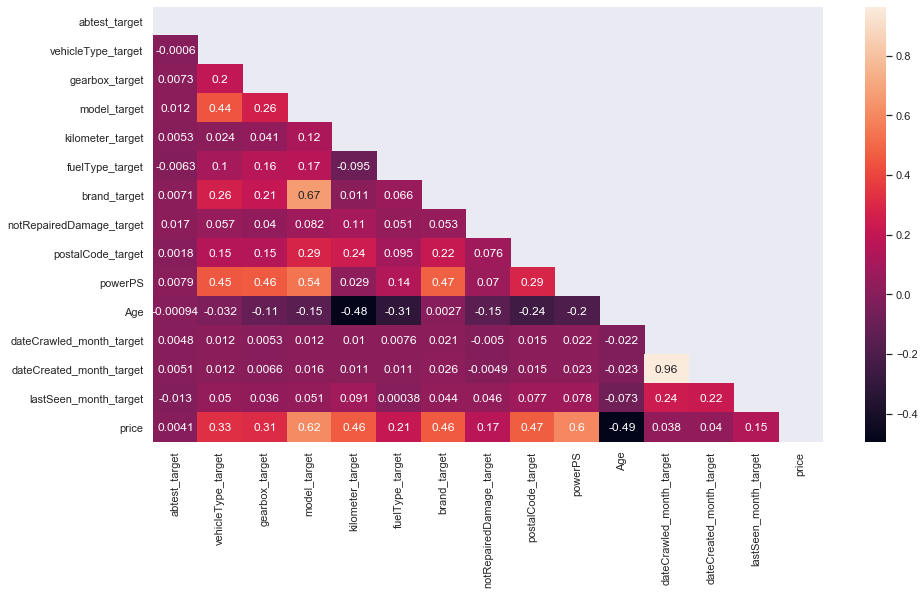

In [126]:
X=cars.copy()
y=cars["price"].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 0,test_size = 0.33)
cat_features=[ 'abtest', 'vehicleType', 'gearbox',  'model','kilometer', 'fuelType', 'brand', 'notRepairedDamage', 'postalCode',"dateCrawled_month","dateCreated_month","lastSeen_month"]
cat_columns = cat_features

from category_encoders import TargetEncoder
target_X_train = X_train.copy()
target_X_valid = X_valid.copy()

# Fit the encoder using the categorical features and target
target_encoder = TargetEncoder(cols=cat_columns)
target_encoder.fit(target_X_train[cat_columns], y_train)

target_X_train=pd.concat([target_X_train,target_encoder.transform(target_X_train[cat_columns]).add_suffix('_target')], axis=1).reindex(target_X_train.index)
# Transform the features, rename the columns with _target suffix, and join to dataframe
target_X_valid = target_X_valid.join(target_encoder.transform(target_X_valid[cat_columns]).add_suffix('_target'))

target_X_train.drop(cat_columns,axis=1,inplace=True)
target_X_valid.drop(cat_columns,axis=1,inplace=True)
        
X_train = target_X_train 
X_valid = target_X_valid
        
        
corr_features = ['abtest_target', 'vehicleType_target', 'gearbox_target',  'model_target','kilometer_target',
                 'fuelType_target', 'brand_target', 'notRepairedDamage_target', 'postalCode_target',"powerPS","Age",
                 "dateCrawled_month_target","dateCreated_month_target","lastSeen_month_target","price"]
df_correlation = X_train[corr_features]
plt.figure(figsize=(15,8))
matrix = np.triu(df_correlation.corr())
sns.heatmap(df_correlation.corr(), annot=True, mask=matrix)

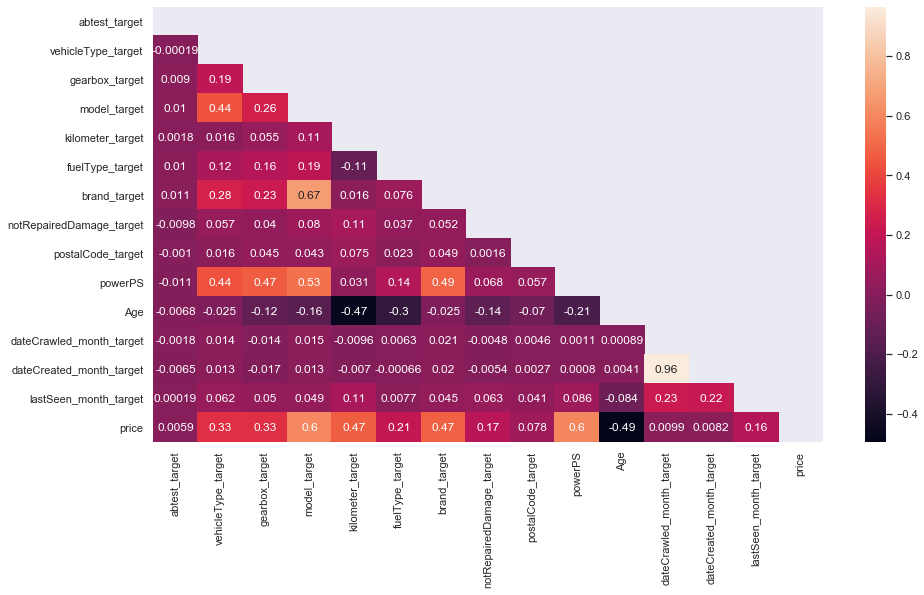

In [127]:
df_correlation = X_valid[corr_features]
plt.figure(figsize=(15,8))
matrix = np.triu(df_correlation.corr())
sns.heatmap(df_correlation.corr(), annot=True, mask=matrix)

# Feature Selection

In [128]:
cars.to_csv("cars_baseline.csv",index_label=False)

In [129]:
import pandas as pd
cars = pd.read_csv("cars_baseline.csv")

In [130]:
# Bidirectional selection:

In [131]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    
    import statsmodels.api as sm
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


In [132]:
def Wrapper_selection(X,y,method):

    from sklearn.model_selection import train_test_split
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 0,test_size = 0.33)

    cat_columns=[ 'abtest', 'vehicleType', 'gearbox',  'model','kilometer', 'fuelType', 'brand', 'notRepairedDamage', 'postalCode',"dateCrawled_month","dateCreated_month","lastSeen_month"]  
    
    from category_encoders import TargetEncoder
    target_X_train = X_train.copy()
    target_X_valid = X_valid.copy()

    # Fit the encoder using the categorical features and target
    target_encoder = TargetEncoder(cols=cat_columns)
    target_encoder.fit(target_X_train[cat_columns], y_train)

    # Transform the features, rename the columns with _target suffix, and join to dataframe
    target_X_train = target_X_train.join(target_encoder.transform(target_X_train[cat_columns]).add_suffix('_target'))
    target_X_valid = target_X_valid.join(target_encoder.transform(target_X_valid[cat_columns]).add_suffix('_target'))

    target_X_train.drop(cat_columns,axis=1,inplace=True)
    target_X_valid.drop(cat_columns,axis=1,inplace=True)
        
    X_train = target_X_train 
    X_valid = target_X_valid
    
    if method=="step":       
        result = stepwise_selection(X_train, y_train)
        
    elif method=="forward":
        result = forward_selection(X_train, y_train)
        
    else:
        result = backward_selection(X_train, y_train)

    print('resulting features:')
    print(result)

In [155]:
included_columns = ["price",'brand_target', 'Age', 'model_target', 'postalCode_target', 'powerPS', 'kilometer_target', 'fuelType_target', 'lastSeen_month_target', 'notRepairedDamage_target', 'gearbox_target']
corr_features = ['abtest_target', 'vehicleType_target', 'gearbox_target',  'model_target','kilometer_target',
                 'fuelType_target', 'brand_target', 'notRepairedDamage_target', 'postalCode_target',"powerPS","Age",
                 "dateCrawled_month_target","dateCreated_month_target","lastSeen_month_target","price"]

print("Following are the insignificant features:")
for col in corr_features:
    if col not in included_columns:
        print(col)

Following are the insignificant features:
abtest_target
vehicleType_target
dateCrawled_month_target
dateCreated_month_target


In [ ]:
# removing redundant variables from Baseline model using Step-wise Selection:
X=cars.drop(["price"],axis=1)
y=cars["price"].values.reshape(-1,1)
Wrapper_selection(X,y,"step")

In [134]:
# Forward Selection:

In [135]:
def forward_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.05,  
                       verbose=True):

    import statsmodels.api as sm
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
        if not changed:
            break

    return included


In [ ]:
# removing redundant variables from Baseline model using Forward Selection:
X=cars.drop(["price"],axis=1)
y=cars["price"].values.reshape(-1,1)
Wrapper_selection(X,y,"forward")

In [137]:
included_columns =["price",'vehicleType_target', 'brand_target', 'Age', 'model_target', 'postalCode_target', 'powerPS', 'kilometer_target', 'fuelType_target', 'lastSeen_month_target', 'notRepairedDamage_target', 'gearbox_target']

print("Following are the insignificant features:")
for col in corr_features:
    if col not in included_columns:
        print(col)

Following are the insignificant features:
abtest_target
dateCrawled_month_target
dateCreated_month_target


In [138]:
#Backward Selection:

In [139]:
def backward_selection(X, y, 
                       initial_list=[],  
                       threshold_out = 0.05, 
                       verbose=True):

    import statsmodels.api as sm
    included = list(X.columns)
    while True:
        changed=False

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


In [ ]:
# removing redundant variables from Baseline model using Backward Selection:
X=cars.drop(["price"],axis=1)
y=cars["price"].values.reshape(-1,1)
Wrapper_selection(X,y,"backward")

In [141]:
included_columns = ["price",'powerPS', 'Age', 'gearbox_target', 'model_target', 'kilometer_target', 'fuelType_target', 'brand_target', 'notRepairedDamage_target', 'postalCode_target', 'lastSeen_month_target']

print("Following are the insignificant features:")
for col in corr_features:
    if col not in included_columns:
        print(col)

Following are the insignificant features:
abtest_target
vehicleType_target
dateCrawled_month_target
dateCreated_month_target


In [142]:
# Dropping Insignificant Variables:
col=['vehicleType','dateCrawled_month',"dateCreated_month","abtest"]
cars=cars.drop(columns=col,axis=1)
cars.head()

,price,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,postalCode,Age,lastSeen_month
1,13299,manual,163,xc_reihe,150000,diesel,volvo,no,88045,11.50,3
3,4500,manual,86,ibiza,60000,petrol,seat,no,34537,11.00,7
4,18750,automatic,185,xc_reihe,150000,diesel,volvo,no,55270,8.92,1
5,988,manual,90,passat,150000,petrol,volkswagen,no,26826,21.17,2
7,1399,manual,136,clk,150000,petrol,mercedes_benz,no,13353,19.92,3


In [143]:
cat_features=[  'gearbox',  'model','kilometer', 'fuelType', 'brand','postalCode','notRepairedDamage',"lastSeen_month"]
X=cars.drop(["price"],axis=1)
y=cars["price"].values.reshape(-1,1)
mlr_metric(X,y,"Target","Metrics",cat_features)

(4442.36172, 5019.83654, 0.72189, 0.6686, 0.84972, 0.8192)

In [144]:
from sklearn.model_selection import train_test_split
X=cars.drop(["price"],axis=1)
y=cars["price"].values.reshape(-1,1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 0,test_size = 0.33)

cat_columns=[  'gearbox',  'model','kilometer', 'fuelType', 'brand','postalCode','notRepairedDamage',"lastSeen_month"]
from category_encoders import TargetEncoder
target_X_train = X_train.copy()
target_X_valid = X_valid.copy()

# Fit the encoder using the categorical features and target
target_encoder = TargetEncoder(cols=cat_columns)
target_encoder.fit(target_X_train[cat_columns], y_train)

target_X_train=pd.concat([target_X_train,target_encoder.transform(target_X_train[cat_columns]).add_suffix('_target')], axis=1).reindex(target_X_train.index)
# Transform the features, rename the columns with _target suffix, and join to dataframe
target_X_valid = target_X_valid.join(target_encoder.transform(target_X_valid[cat_columns]).add_suffix('_target'))

target_X_train.drop(cat_columns,axis=1,inplace=True)
target_X_valid.drop(cat_columns,axis=1,inplace=True)
        
X_train = target_X_train 
X_valid = target_X_valid

z=X_train
df_cor =z.corr()
pd.DataFrame(np.linalg.inv(z.corr().values), index =df_cor.index, columns=df_cor.columns)

,powerPS,Age,gearbox_target,model_target,kilometer_target,fuelType_target,brand_target,postalCode_target,notRepairedDamage_target,lastSeen_month_target
powerPS,1.828284,0.306499,-0.585518,-0.550172,0.246868,0.085691,-0.340397,-0.188915,-0.008787,-0.062650
Age,0.306499,1.661129,-0.061571,0.011098,0.807899,0.547742,-0.221871,0.115107,0.115939,0.021748
gearbox_target,-0.585518,-0.061571,1.289062,0.001744,-0.075832,-0.152882,0.018302,-0.016337,-0.004350,0.001547
model_target,-0.550172,0.011098,0.001744,2.161424,-0.201489,-0.218605,-1.136347,-0.138668,-0.034748,0.014035
kilometer_target,0.246868,0.807899,-0.075832,-0.201489,1.510427,0.421774,0.037170,-0.207481,-0.044510,-0.067609
fuelType_target,0.085691,0.547742,-0.152882,-0.218605,0.421774,1.258649,0.057283,-0.039102,-0.009744,0.012462
brand_target,-0.340397,-0.221871,0.018302,-1.136347,0.037170,0.057283,1.930706,-0.068773,-0.019887,-0.015170
postalCode_target,-0.188915,0.115107,-0.016337,-0.138668,-0.207481,-0.039102,-0.068773,1.197418,-0.019106,-0.038839
notRepairedDamage_target,-0.008787,0.115939,-0.004350,-0.034748,-0.044510,-0.009744,-0.019887,-0.019106,1.030276,-0.030153
lastSeen_month_target,-0.062650,0.021748,0.001547,0.014035,-0.067609,0.012462,-0.015170,-0.038839,-0.030153,1.016893


In [145]:
X_train.head(2)

,powerPS,Age,gearbox_target,model_target,kilometer_target,fuelType_target,brand_target,postalCode_target,notRepairedDamage_target,lastSeen_month_target
206,116,15.33,5410.174869,7204.961481,4334.466011,9363.611851,10111.136827,3852.271849,7343.744437,7955.567577
40964,90,20.42,11589.943651,4010.041026,12733.501475,5623.921801,3031.295031,1254.118956,2530.497942,5687.068943


In [146]:
cat_features=[  'gearbox',  'model','kilometer', 'fuelType', 'brand','postalCode','notRepairedDamage',"lastSeen_month"]
X=cars.drop(["price"],axis=1)
y=cars["price"].values.reshape(-1,1)
mlr_metric(X,y,"Target","Metrics",cat_features)

(4442.36172, 5019.83654, 0.72189, 0.6686, 0.84972, 0.8192)

In [147]:
cat_features=[  'gearbox',  'model','kilometer', 'fuelType', 'brand','postalCode','notRepairedDamage',"lastSeen_month"]
X=cars.drop(["price"],axis=1)
y=cars["price"].values.reshape(-1,1)
df_obs_pre = mlr_metric(X,y,"Target","obs_pre_train",cat_features)
df_obs_pre

,Actual,Predicted
0,1550,4984.142634
1,600,1147.380705
2,3499,5800.030006
3,5500,4113.601861
4,3800,4001.421942
...,...,...
22001,1450,2660.283245
22002,700,1912.601766
22003,900,-2213.541449
22004,2500,4371.181241


In [148]:
# On Train Data:
cat_features=[  'gearbox',  'model','kilometer', 'fuelType', 'brand','postalCode','notRepairedDamage',"lastSeen_month"]
X=cars.drop(["price"],axis=1)
y=cars["price"].values.reshape(-1,1)
df_obs_pre = mlr_metric(X,y,"Target","obs_pre_train",cat_features)
df_obs_pre["Residuals"]= df_obs_pre.apply(lambda row : round(row["Actual"]-row["Predicted"],2), axis=1)
df_obs_pre.head()

,Actual,Predicted,Residuals
0,1550,4984.142634,-3434.14
1,600,1147.380705,-547.38
2,3499,5800.030006,-2301.03
3,5500,4113.601861,1386.40
4,3800,4001.421942,-201.42


In [149]:


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_obs_pre["Std_Residuals"] = scaler.fit_transform(df_obs_pre["Residuals"].values.reshape(-1, 1))
df_obs_pre.head()

,Actual,Predicted,Residuals,Std_Residuals
0,1550,4984.142634,-3434.14,-0.773044
1,600,1147.380705,-547.38,-0.123218
2,3499,5800.030006,-2301.03,-0.517974
3,5500,4113.601861,1386.40,0.312086
4,3800,4001.421942,-201.42,-0.045341


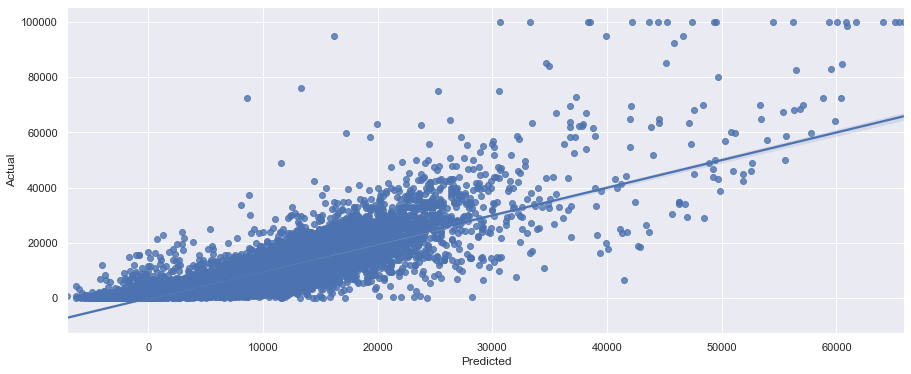

In [150]:
plt.figure(figsize=(15,6))
sns.regplot(x=df_obs_pre["Predicted"], y=df_obs_pre["Actual"])

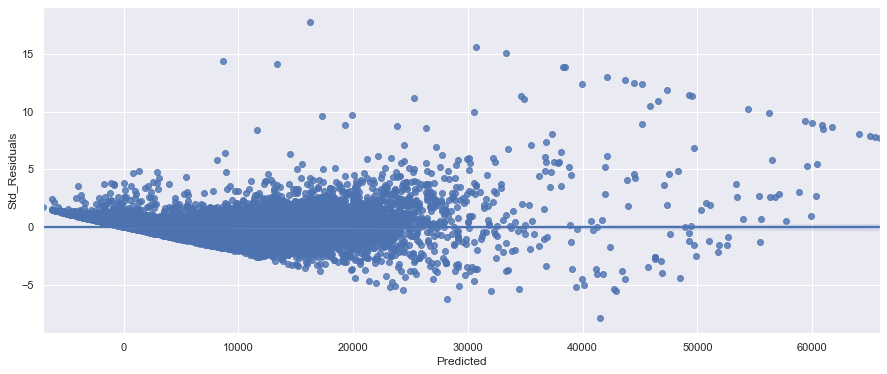

In [151]:
plt.figure(figsize=(15,6))
sns.regplot(x=df_obs_pre["Predicted"], y=df_obs_pre["Std_Residuals"])

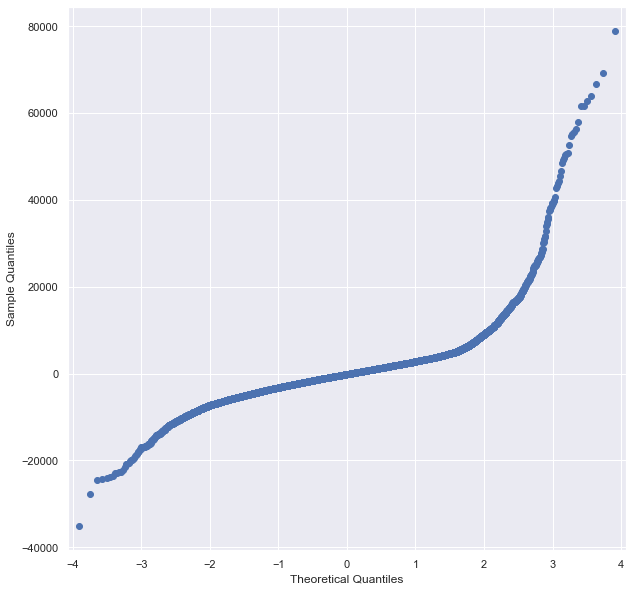

In [152]:
#QQ-Plot:
import statsmodels.api as sm
import scipy.stats as stats
fig = sm.qqplot(df_obs_pre["Residuals"])
plt.show()

In [153]:
#Checking for normality of residual using Shapiro wilk test:
from scipy.stats import norm
from scipy.stats import shapiro
#from statsmodels.stats import shapiro
H,p = shapiro(df_obs_pre["Residuals"])
print("Test Statistics: ",H)
print("P-value: ",p)
alpha = 0.05
if p > alpha:
    print('Conclusion: normal')
else:
    print('Conclusion: not normal')

Test Statistics:  0.7953947186470032
P-value:  0.0
Conclusion: not normal


C:\Users\jaisw\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [154]:
#Obtaining the leverage points in the data:
from sklearn.model_selection import train_test_split
X=cars.drop(["price"],axis=1)
y=cars["price"].values.reshape(-1,1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 0,test_size = 0.33)

cat_columns=[  'gearbox',  'model','kilometer', 'fuelType', 'brand','postalCode','notRepairedDamage',"lastSeen_month"]
from category_encoders import TargetEncoder
target_X_train = X_train.copy()
target_X_valid = X_valid.copy()

# Fit the encoder using the categorical features and target
target_encoder = TargetEncoder(cols=cat_columns)
target_encoder.fit(target_X_train[cat_columns], y_train)

target_X_train=pd.concat([target_X_train,target_encoder.transform(target_X_train[cat_columns]).add_suffix('_target')], axis=1).reindex(target_X_train.index)
# Transform the features, rename the columns with _target suffix, and join to dataframe
target_X_valid = target_X_valid.join(target_encoder.transform(target_X_valid[cat_columns]).add_suffix('_target'))

target_X_train.drop(cat_columns,axis=1,inplace=True)
target_X_valid.drop(cat_columns,axis=1,inplace=True)
        
X_train = target_X_train 
X_valid = target_X_valid

import statsmodels.api as sm
from scipy import stats
X2 = sm.add_constant(X_train)
model = sm.OLS(y_train, X2.astype(float))
results = model.fit()

#create instance of influence
influence = results.get_influence()

#leverage (hat values)
leverage = influence.hat_matrix_diag

In [155]:
list(leverage)[:10]

[0.00033413462615226636,
 0.0012198023272897182,
 0.0005374985738216715,
 0.00026910960059778734,
 0.00033727577250293114,
 0.0005259830801191735,
 0.00028189766569303913,
 0.0005588759525369452,
 0.0006030107579262806,
 0.0002169826090573588]

In [156]:
threshold_lev = 2*(cars.shape[1]+1)/cars.shape[0]
# Since 2(p+1) < n, we can use this threshold value
no_of_leverage = 0
for i in list(leverage):
    if i>threshold_lev:
        no_of_leverage+=1
print('Number of leverage points are',no_of_leverage)    

Number of leverage points are 2821


In [157]:
influence.hat_matrix_diag

array([0.00033413, 0.0012198 , 0.0005375 , ..., 0.00020631, 0.00028539,
       0.00088542])

Observation with large hat diagonal and large residuals are likely to be influential.

In [ ]:
 #Checking for influential points in the data:
from statsmodels.formula.api import ols
infl = results.get_influence()
sm_fr = infl.summary_frame()

In [ ]:
sm_fr.head()

In [ ]:
threshold = 4/cars.shape[0]
sm_fr.sort_values("cooks_d",ascending=False).head()

In [ ]:
sm_fr.shape

In [159]:
threshold_inf = 2*np.sqrt((cars.shape[1]+1)/cars.shape[0])

In [ ]:
count = 0
for i in sm_fr['dffits']:
    if abs(i)>threshold_inf:
        count+=1
print("The number of influential points are: ",count)

In [ ]:
inf_df = sm_fr[sm_fr["cooks_d"]>threshold]
inf_df.head()

In [ ]:
print("The number of influential points are: ",inf_df.shape[0])

In [162]:
cars.head(1)

,price,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,postalCode,Age,lastSeen_month
1,13299,manual,163,xc_reihe,150000,diesel,volvo,no,88045,11.5,3


In [ ]:
# Detecting Hetroscedasticity in the Data:
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.diagnostic import het_breuschpagan
f ='price ~ gearbox + powerPS + model + fuelType + brand + notRepairedDamage + postalCode + Age + lastSeen_month'
cars_model = ols(formula=f, data=cars).fit()
white_test = het_white(cars_model.resid,  cars_model.model.exog)
#bp_test = het_breuschpagan(cars_model.resid, [cars.Age, cars.powerPS])


In [164]:
from sklearn.model_selection import train_test_split
X=cars.drop(["price"],axis=1)
y=cars["price"]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 0,test_size = 0.33)

cat_columns=[  'gearbox',  'model','kilometer', 'fuelType', 'brand','postalCode','notRepairedDamage',"lastSeen_month"]
from category_encoders import TargetEncoder
target_X_train = X_train.copy()
target_X_valid = X_valid.copy()

# Fit the encoder using the categorical features and target
target_encoder = TargetEncoder(cols=cat_columns)
target_encoder.fit(target_X_train[cat_columns], y_train)

target_X_train=pd.concat([target_X_train,target_encoder.transform(target_X_train[cat_columns]).add_suffix('_target')], axis=1).reindex(target_X_train.index)
# Transform the features, rename the columns with _target suffix, and join to dataframe
target_X_valid = target_X_valid.join(target_encoder.transform(target_X_valid[cat_columns]).add_suffix('_target'))

target_X_train.drop(cat_columns,axis=1,inplace=True)
target_X_valid.drop(cat_columns,axis=1,inplace=True)
        
X_train = target_X_train 
X_valid = target_X_valid

In [165]:
import statsmodels.api as sm
from scipy import stats
X2 = sm.add_constant(X_train)
model = sm.OLS(y_train, X2.astype(float))
results = model.fit()
X_test = sm.add_constant(X_valid)

In [166]:
y_pred = results.predict(X_test)

In [167]:
residual = y_valid - y_pred

# Multicollinearity

In [168]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=['powerPS','Age','gearbox_target','model_target','kilometer_target',
                                         'fuelType_target','brand_target','postalCode_target','notRepairedDamage_target',
                                         'lastSeen_month_target'])

In [169]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X_train.columns).T

,powerPS,Age,gearbox_target,model_target,kilometer_target,fuelType_target,brand_target,postalCode_target,notRepairedDamage_target,lastSeen_month_target
vif,1.828284,1.661129,1.289062,2.161424,1.510427,1.258649,1.930706,1.197418,1.030276,1.016893


All variables have vif < 5, so there is no multicollinearity in our dataset

# Homoskedasticity

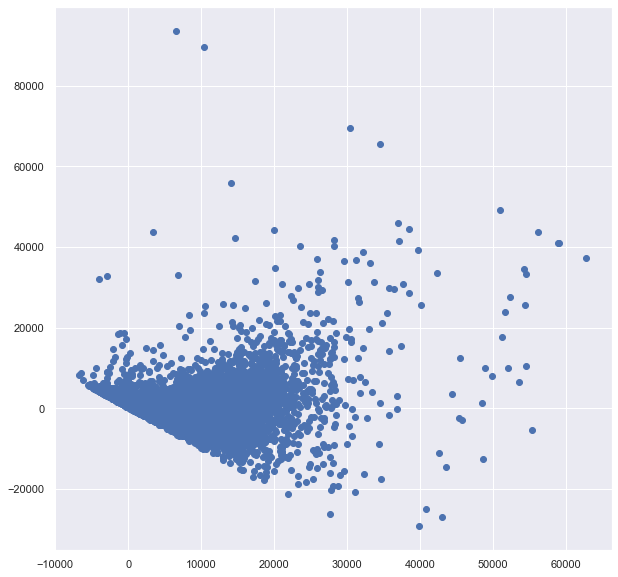

In [170]:
plt.scatter(y_pred, residual)

There is heteroskedasticity in our data

# Autocorrelation

In [171]:
residual.shape

(10840,)

C:\Users\jaisw\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


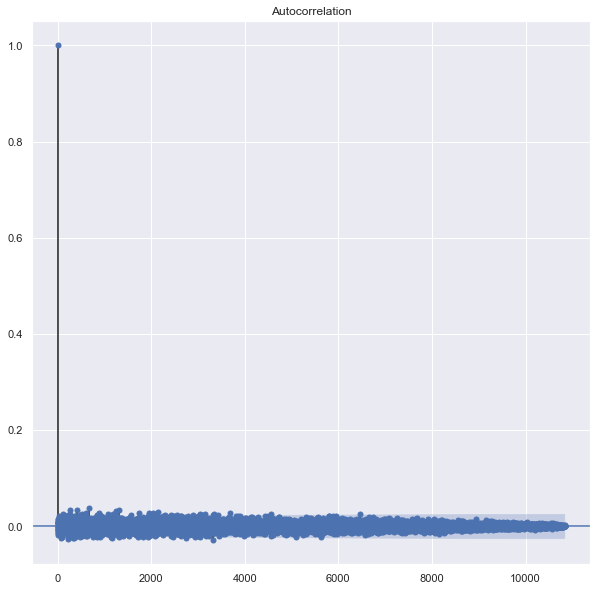

In [172]:
acf = sm.graphics.tsa.plot_acf(residual, lags=10839, alpha=0.05)
acf.show()

All the points are within the shaded curve, hence there is no autocorrelation

In [173]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(cars['model'],cars['powerPS']))

(494086.5102650408,
 0.0,
 74601,
 array([[3.41654996e-01, 2.83139499e-03, 2.73701516e-02, ...,
         3.77519333e-03, 9.43798332e-04, 6.60658832e-02],
        [5.40035316e-01, 4.47543080e-03, 4.32624977e-02, ...,
         5.96724106e-03, 1.49181027e-03, 1.04426719e-01],
        [6.06162090e-01, 5.02344273e-03, 4.85599464e-02, ...,
         6.69792364e-03, 1.67448091e-03, 1.17213664e-01],
        ...,
        [1.87359191e-01, 1.55270048e-03, 1.50094380e-02, ...,
         2.07026731e-03, 5.17566827e-04, 3.62296779e-02],
        [1.31151434e+00, 1.08689034e-02, 1.05066066e-01, ...,
         1.44918712e-02, 3.62296779e-03, 2.53607745e-01],
        [2.81038787e+00, 2.32905072e-02, 2.25141570e-01, ...,
         3.10540096e-02, 7.76350241e-03, 5.43445168e-01]]))

In [174]:
cars.columns

Index(['price', 'gearbox', 'powerPS', 'model', 'kilometer', 'fuelType',
       'brand', 'notRepairedDamage', 'postalCode', 'Age', 'lastSeen_month'],
      dtype='object')

In [175]:
car=cars.drop(['price', 'powerPS', 'Age'],axis=1)

In [ ]:
import numpy as np
factors_paired = [(i,j) for i in car.columns.values for j in car.columns.values] 

chi2, p_values =[], []

for f in factors_paired:
    if f[0] != f[1]:
        chitest = chi2_contingency(pd.crosstab(car[f[0]], car[f[1]]))   
        chi2.append(chitest[0])
        p_values.append(chitest[1])
    else:      # for same factor pair
        chi2.append(0)
        p_values.append(0)

chi2 = np.array(chi2).reshape((23,23)) # shape it as a matrix
chi2 = pd.DataFrame(chi2, index=car.columns.values, columns=car.columns.values) # then a df for convenience

In [177]:
from statsmodels.stats.diagnostic import het_breuschpagan
lm, lm_pvalue, fvalue, f_pvalue = het_breuschpagan(y_train,X_train)
print('the p-value for the lagrange multiplier test statistic is %f' % (lm_pvalue))

the p-value for the lagrange multiplier test statistic is 1.000000


In [ ]:
ols_test_breusch_pagan(model)

In [179]:
from statsmodels.stats.stattools import durbin_watson
durbinWatson = durbin_watson(residual)
print('Durbin-Watson:', durbinWatson)

Durbin-Watson: 1.9851867798719196


In [180]:
if(durbinWatson < 1.5):
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif(durbinWatson > 2.5):
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Little to no autocorrelation 

Assumption satisfied


In [181]:
import statsmodels.stats.api as sms
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(results.resid, results.model.exog)
print(test)

(0.9731199813137374, 0.9233997291363905, 'increasing')


Goldfeld quandt test is not reliable since we have not checked whether any of the predictor is positively related to the response